<a href="https://colab.research.google.com/github/luc-perso/covid-19-xRay/blob/main/codes_ByAmani/Descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!unzip -q '/content/drive/MyDrive/data_equalize.zip' -d '/content/'


All


In [4]:
import matplotlib.pyplot as plt
import os
import random
import cv2
import numpy as np
from scipy.stats import norm

In [5]:
lungdir ='/content/data_equalize/Lung Segmentation Data'
infectdir ='/content/data_equalize/Infection Segmentation Data'

train= '/Train'
test= '/Test'
val= '/Val'

covid= '/COVID-19/images'
noncovid='/Non-COVID/images'
normal= '/Normal/images'




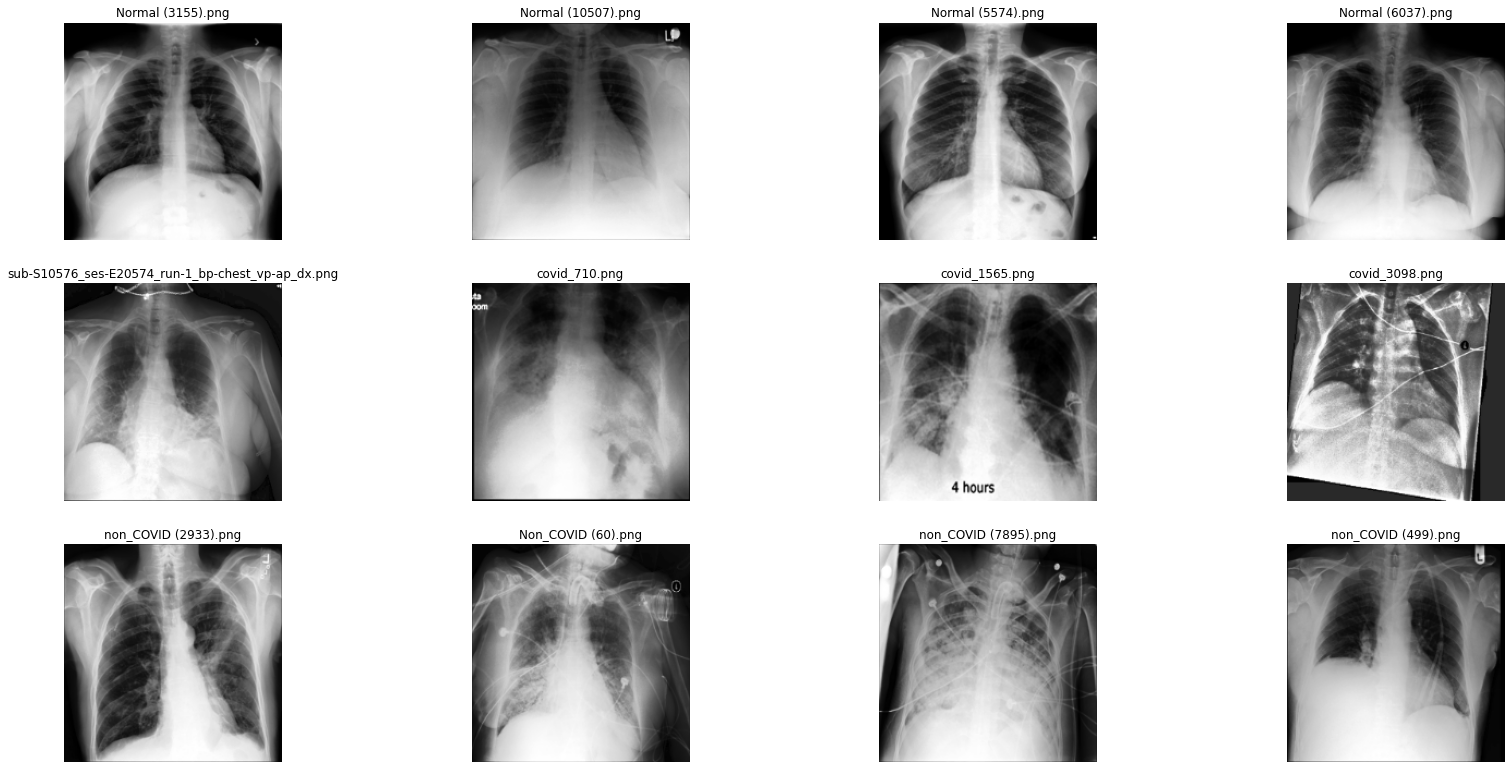

In [6]:
## explore few images 

cnt_imgs = 4  # we take 4 images for each class



counter = 0
IMAGE_SIZE = (200, 200)
normal_imgs_path = [lungdir + train + normal + '/' + i for i in os.listdir(lungdir + train + normal)[:cnt_imgs]]
covid_imgs_path = [lungdir + train + covid + '/' + j for j in os.listdir(lungdir + train + covid)[:cnt_imgs]]
non_covid_imgs_path = [lungdir + train + noncovid + '/' + l for l in os.listdir(lungdir + train + noncovid)[:cnt_imgs]]

all_imgs = normal_imgs_path + covid_imgs_path + non_covid_imgs_path
#random.shuffle(all_imgs)


plt.figure(figsize=(28, 28))
for img_path in all_imgs:
    plt.subplot(6, 4, counter+1)
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMAGE_SIZE)
    label = os.path.basename(img_path).split('/')[-1]
    
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    counter += 1


In [7]:
## check the number of cases in lung segmentation file
def check_len_lungdir(label_1: str) -> int:
    """A function that should determine the number of objects of this
    class in the specified directories"""
    cnt_object = []
    paths_lungdir = [lungdir + train , lungdir+test ,lungdir+val]
    
    for path in paths_lungdir:
        path += '/' + label_1
        
        cnt_object.append(len(os.listdir(path)))
    return cnt_object

def check_len_infectdir(label_1: str) -> int:
    """A function that should determine the number of objects of this
    class in the specified directories"""
    cnt_object = []
    paths_infectdir = [infectdir+train , infectdir+test ,infectdir+val ]
    
    for path in paths_infectdir:
        path += '/' + label_1
        
        cnt_object.append(len(os.listdir(path)))
    return cnt_object


CNT_COVID_infdir = check_len_infectdir(covid)
CNT_Non_COVID_infdir = check_len_infectdir(noncovid)
CNT_Normal_infdir = check_len_infectdir(normal)

CNT_COVID_lungdir = check_len_lungdir(covid)
CNT_Non_COVID_lungdir = check_len_lungdir(noncovid)
CNT_Normal_lungdir = check_len_lungdir(normal)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(
    x=['COVID','Non_COVID','Normal'],
    y=[sum(CNT_COVID_infdir), sum(CNT_Non_COVID_infdir), sum(CNT_Normal_infdir)],
    name="Infection Segmentation Data",
    marker_color='blue',
    width=[0.4, 0.4, 0.4])
             , row=1, col=1)


fig.add_trace(
    go.Bar(
    x=['COVID','Non_COVID','Normal'],
    y=[sum(CNT_COVID_lungdir), sum(CNT_Non_COVID_lungdir), sum(CNT_Normal_lungdir)],
    name="Lung Segmentation Data",
    marker_color='indianred',
    width=[0.4, 0.4, 0.4])
              , row=1, col=2)



fig.update_layout(height=400, width=900, title_text="The number of classes in the data sets ")
#fig= plt.gcf()
#fig.savefig("number_of_cases.pdf")
fig.show()

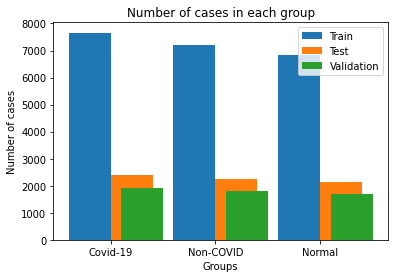

In [ ]:
# show the cases for each group divided to train , test, val 
X = ['Covid-19','Non-COVID','Normal']
train_ = [CNT_COVID_lungdir[0],CNT_Non_COVID_lungdir[0],CNT_Normal_lungdir[0]]
test_ = [CNT_COVID_lungdir[1],CNT_Non_COVID_lungdir[1],CNT_Normal_lungdir[1]]
val_ = [CNT_COVID_lungdir[2],CNT_Non_COVID_lungdir[2],CNT_Normal_lungdir[2]]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train_, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test_, 0.4, label = 'Test')
plt.bar(X_axis + 0.3, val_, 0.4, label="Validation")
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of cases")
plt.title("Number of cases in each group")
plt.legend()
plt.show()

In [ ]:
## check the brightness and contrast of images 
from PIL import Image, ImageStat
def brightness( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    return stat.mean[0]

def check_all_brightness( paths ):
    bright=[]
    for img_path in paths:
        im = brightness(img_path)
        bright.append(im)
    return bright


 
####################
##  for train data
normal_imgs_tr = [lungdir+train+normal + '/' + i for i in os.listdir(lungdir+train+normal)]
covid_imgs_tr = [lungdir+train+covid + '/' + j for j in  os.listdir(lungdir+train+covid)]
noncovid_imgs_tr = [lungdir+train+noncovid + '/' + l for l in  os.listdir(lungdir+train+noncovid)]

####################
## for test data
normal_imgs_ts = [lungdir+test+normal + '/' + i for i in os.listdir(lungdir+test+normal)]
covid_imgs_ts = [lungdir+test+covid + '/' + j for j in  os.listdir(lungdir+test+covid)]
noncovid_imgs_ts = [lungdir+test+noncovid + '/' + l for l in  os.listdir(lungdir+test+noncovid)]

#####################
## for val
normal_imgs_vl = [lungdir+val+normal + '/' + i for i in os.listdir(lungdir+val+normal)]
covid_imgs_vl = [lungdir+val+covid + '/' + j for j in  os.listdir(lungdir+val+covid)]
noncovid_imgs_vl = [lungdir+val+noncovid + '/' + l for l in  os.listdir(lungdir+val+noncovid)]

covid_bright=check_all_brightness(covid_imgs_tr+covid_imgs_ts+covid_imgs_vl)
non_covid_bright=check_all_brightness(noncovid_imgs_tr+noncovid_imgs_ts+noncovid_imgs_vl)
normal_bright=check_all_brightness(normal_imgs_tr+normal_imgs_ts+normal_imgs_vl)


muC, stdC = norm.fit(covid_bright) 
muN, stdN = norm.fit(non_covid_bright)
muNo, stdNo = norm.fit(normal_bright)
#muC ,stdC,muN ,stdN,muNo ,stdNo
print("mean of brightness of Covid_19 images", muC)
print("mean of contrast of Covid_19 images", stdC)
print("mean of brightness of Non_Covid images", muN)
print("mean of contrast of Non_Covid images", stdN)
print("mean of brightness of Normal images", muNo)
print("mean of contrast of Covid_19 images", stdNo)

mean of brightness of Covid_19 images 124.79925024355856
mean of contrast of Covid_19 images 7.149246476537723
mean of brightness of Non_Covid images 124.83030668846469
mean of contrast of Non_Covid images 7.320314684965669
mean of brightness of Normal images 123.78608150783404
mean of contrast of Covid_19 images 6.209434110325114
